# Titanic: Machine Learning from Disaster

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

Reading the csv file: 

In [2]:
df = pd.read_csv('train.csv',header=0)
ID = df['PassengerId']
df = df.drop('PassengerId',axis=1)
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling

In the first attempts I just dropped some columns and substituted missing values by the median. But with this approach I ended up scoring in my tests always something between 75% and 81% in the tests. So I decided to visualize some data plots to understand better what is going on. 

### Survival Rates - by Class

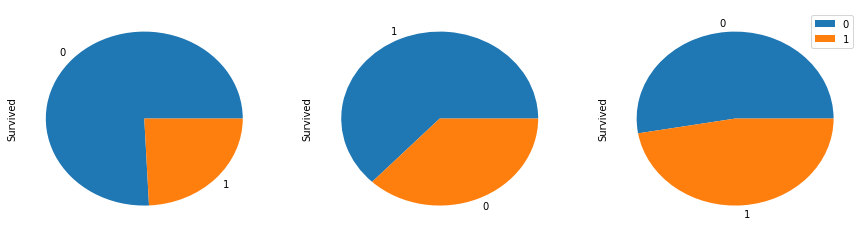

In [4]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in df['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    
    df.Survived[df['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1
    
plt.legend(loc="upper right")

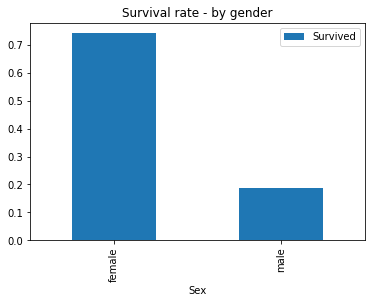

In [5]:
# Survived by gender

sex_pivot = df.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.title('Survival rate - by gender'.format(pclass))
plt.show()

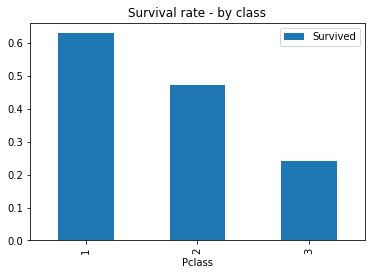

In [6]:
# Survived by class 

class_pivot = df.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.title('Survival rate - by class'.format(pclass))
plt.show()

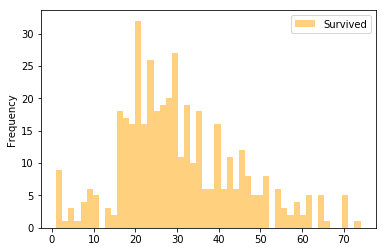

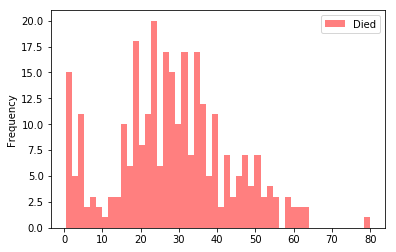

In [7]:
# Survived by age
survived = df[df["Survived"] == 1]
died = df[df["Survived"] == 0]

#fig, ax = plt.subplots(ncols=2, figsize=(10,4))
#plt.subplot(1, 2, 1)
died["Age"].plot.hist(alpha=0.5,color='orange',bins=50)
plt.legend(['Survived'])
plt.show()

#plt.subplot(1, 2, 2)
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Died'])
plt.show()

In [8]:
# new data frame with split value columns 
df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
raw = df


In [9]:
# size of families (including the passenger)
df['FamilySize'] = df.Parch + df.SibSp + 1

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [11]:
grouped = df.groupby(['Pclass','Title'])
grouped.median()

Survived   Age  SibSp  Parch       Fare  FamilySize
Pclass Title                                                            
1      Capt               0.0  70.0    1.0    1.0   71.00000         3.0
       Col                0.5  58.0    0.0    0.0   31.02500         1.0
       Don                0.0  40.0    0.0    0.0   27.72080         1.0
       Dr                 1.0  46.5    0.0    0.0   39.60000         1.0
       Jonkheer           0.0  38.0    0.0    0.0    0.00000         1.0
       Lady               1.0  48.0    1.0    0.0   39.60000         2.0
       Major              0.5  48.5    0.0    0.0   28.52500         1.0
       Master             1.0   4.0    1.0    2.0  120.00000         4.0
       Miss               1.0  30.0    0.0    0.0   91.75000         1.0
       Mlle               1.0  24.0    0.0    0.0   59.40210         1.0
       Mme                1.0  24.0    0.0    0.0   69.30000         1.0
       Mr                 0.0  40.0    0.0    0.0   42.40000         1.0
       Mrs                1.0  41.5    1.0    0.0   79.42500         2.0
       Sir                1.0  49.0    1.0    0.0   56.92920         2.0
       the Countess       1.0  33.0    0.0    0.0   86.50000         1.0
2      Dr                 0.0  38.5    0.0    0.0   12.25000         1.0
       Master             1.0   1.0    1.0    1.0   26.00000         3.0
       Miss               1.0  24.0    0.0    0.0   13.00000         1.0
       Mr                 0.0  31.0    0.0    0.0   13.00000         1.0
       Mrs                1.0  32.0    1.0    0.0   26.00000         2.0
       Ms                 1.0  28.0    0.0    0.0   13.00000         1.0
       Rev                0.0  46.5    0.0    0.0   13.00000         1.0
3      Master             0.0   4.0    3.5    1.0   28.51250         6.0
       Miss               0.5  18.0    0.0    0.0    8.75625         1.0
       Mr                 0.0  26.0    0.0    0.0    7.89580         1.0
       Mrs                0.5  31.0    1.0    1.0   15.97500         3.0

From all the Mr on board there is a considerably difference according to what class they're in. 
For a Mr in the 1 class the median for age is 40 while a Mr in the 3 class median is 26 yo.

In [12]:
df["Age"] = df.groupby(['Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [13]:
count1 = df[df['Pclass']==2].count()

count2 = df.count()
count1

Survived      184
Pclass        184
Name          184
Sex           184
Age           184
SibSp         184
Parch         184
Ticket        184
Fare          184
Cabin          16
Embarked      184
Title         184
FamilySize    184
dtype: int64

In [14]:
#surv_class = df.groupby('Pclass').count()

survived = df[df["Survived"] == 1].groupby('Pclass').count()
survived["Survived"]

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [15]:
cols = ['Name','Parch','SibSp','Ticket','Cabin','Embarked','Fare']
df = df.drop(cols,axis=1)
df.head()

,Survived,Pclass,Sex,Age,Title,FamilySize
0,0,3,male,22.0,Mr,2
1,1,1,female,38.0,Mrs,2
2,1,3,female,26.0,Miss,1
3,1,1,female,35.0,Mrs,2
4,0,3,male,35.0,Mr,1


In [16]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [17]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

# map the normalized titles to the current titles 
df.Title = df.Title.map(normalized_titles)

In [18]:
df.head(30)

,Survived,Pclass,Sex,Age,Title,FamilySize
0,0,3,male,22.0,Mr,2
1,1,1,female,38.0,Mrs,2
2,1,3,female,26.0,Miss,1
3,1,1,female,35.0,Mrs,2
4,0,3,male,35.0,Mr,1
5,0,3,male,26.0,Mr,1
6,0,1,male,54.0,Mr,1
7,0,3,male,2.0,Master,5
8,1,3,female,27.0,Mrs,3
9,1,2,female,14.0,Mrs,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           891 non-null float64
Title         891 non-null object
FamilySize    891 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB


Converting categorical variable into dummy/indicator/numerical variables: pd.get_dummies

This step is particulary important because sklearn only works with numeric matrices.

In [20]:
dummies = []
cols = ['Pclass','Sex']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [21]:
titanic_dummies = pd.concat(dummies, axis=1)
titanic_dummies.head()

,1,2,3,female,male
0,0,0,1,0,1
1,1,0,0,1,0
2,0,0,1,1,0
3,1,0,0,1,0
4,0,0,1,0,1


pandas.concat: Concatenate pandas objects along a particular axis with optional set logic along the other axes.

*axis(The axis to concatenate along): {0/’index’, 1/’columns’}, default 0

In [22]:
titanic_dummies = pd.concat(dummies, axis=1)

In [23]:
titanic_dummies.rename(columns={1: 'P_class1',2: 'P_class2',3: 'P_class3'},inplace=True)
titanic_dummies.head()

,P_class1,P_class2,P_class3,female,male
0,0,0,1,0,1
1,1,0,0,1,0
2,0,0,1,1,0
3,1,0,0,1,0
4,0,0,1,0,1


In [24]:
df = pd.concat((df,titanic_dummies),axis=1)
df.head()

,Survived,Pclass,Sex,Age,Title,FamilySize,P_class1,P_class2,P_class3,female,male
0,0,3,male,22.0,Mr,2,0,0,1,0,1
1,1,1,female,38.0,Mrs,2,1,0,0,1,0
2,1,3,female,26.0,Miss,1,0,0,1,1,0
3,1,1,female,35.0,Mrs,2,1,0,0,1,0
4,0,3,male,35.0,Mr,1,0,0,1,0,1


In [25]:
df['Number_Title'] = pd.factorize(df['Title'])[0] + 1 
df['Number_Title'].head() 

0    1
1    2
2    3
3    2
4    1
Name: Number_Title, dtype: int64

Dropping the columns of features converted  

In [26]:
cols = ['Pclass','Sex','Title']
df = df.drop(cols,axis=1)

In [27]:
df.head()

,Survived,Age,FamilySize,P_class1,P_class2,P_class3,female,male,Number_Title
0,0,22.0,2,0,0,1,0,1,1
1,1,38.0,2,1,0,0,1,0,2
2,1,26.0,1,0,0,1,1,0,3
3,1,35.0,2,1,0,0,1,0,2
4,0,35.0,1,0,0,1,0,1,1


In [28]:
#O que fazer com a coluna title? 

To many null values for the feature 'Age'. 

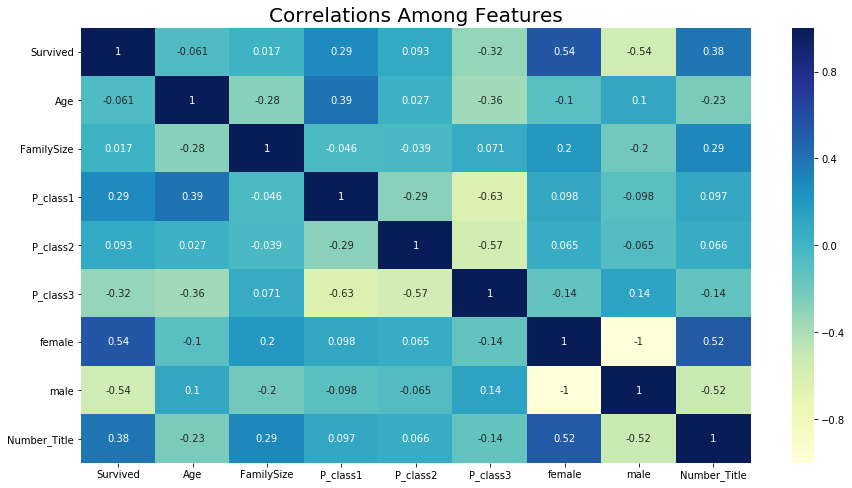

In [29]:
from sklearn.preprocessing import Imputer
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")
plt.title("Correlations Among Features", fontsize = 20);

Correlation Analysis: 

# Machine Learning

In [30]:
# Packages for machine learning classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [31]:
X = df.values
y = df['Survived'].values
Xcol = df.drop('Survived',axis=1)


Deleting the column survived in X:

In [32]:
X = X[:,1:]

Spliting the dataset: 70% training and 30% cross validation

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

<font color=red>**Decision tree classifier**</font> algorithm:

In [34]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.82089552238805974

Not bad. (I can try to play a bit with max_depth value) 

In [35]:
dtc.feature_importances_

array([ 0.09259986,  0.08761272,  0.03139306,  0.        ,  0.1632558 ,
        0.        ,  0.        ,  0.62513856])

The array dtc.feature_importances_ shows that some of the features are highly relevant (contributing a lot to the result) 
|
In scikit-learn, the feature "importance" is described as "gini importance" or "mean decrease impurity". The total decrease in node impurity - weighted by the probability of reaching that node - averaged over all trees of the ensemble.

In [53]:
feature_importances = pd.DataFrame(dtc.feature_importances_)
feature_importances.rename(columns={0: 'Importance'},inplace=True)
feature_importances.index = Xcol.columns
feature_importances.sort_values(by=['Importance'],ascending=False)

,Importance
Number_Title,0.625139
P_class3,0.163256
Age,0.092600
FamilySize,0.087613
P_class1,0.031393
P_class2,0.000000
female,0.000000
male,0.000000


The sorted table Importance suggests what fetures have a high impact in the Survived prediction

<font color=red>**Gradient booster**</font> algorithm:  

In [37]:
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(n_estimators=40, max_features='sqrt')
clf.fit (X_train, y_train)
clf.score (X_test, y_test)

0.83208955223880599

In [38]:
feature_importances = pd.DataFrame(clf.feature_importances_)
feature_importances.rename(columns={0: 'Importance'},inplace=True)
feature_importances.index = Xcol.columns
feature_importances.sort_values(by=['Importance'],ascending=False)

,Importance
Number_Title,0.233672
Age,0.199704
FamilySize,0.154390
P_class3,0.117485
female,0.113416
male,0.078548
P_class1,0.062364
P_class2,0.040421


<font color=red>**Random Forests**</font> algorithm: 

In [39]:
random_forest = ensemble.RandomForestClassifier(n_estimators=33)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)

0.82835820895522383




Logistic Regression

Stochastic Gradient Descent (SGD):

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

Random Forest:

In [41]:
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.80223880597014929

O que tenho que fazer: 
fazer o mesmo tratamento pra o test data set e submeter...

# Test Data Set

Both our train and test set should have same dimensions for machine learning to work.

In [42]:
tdf = pd.read_csv('test.csv',header=0)
tID = tdf['PassengerId']
tdf = tdf.drop('PassengerId',axis=1)
df.head()

,Survived,Age,FamilySize,P_class1,P_class2,P_class3,female,male,Number_Title
0,0,22.0,2,0,0,1,0,1,1
1,1,38.0,2,1,0,0,1,0,2
2,1,26.0,1,0,0,1,1,0,3
3,1,35.0,2,1,0,0,1,0,2
4,0,35.0,1,0,0,1,0,1,1


In [43]:
# new data frame with split value columns 
tdf['Title'] = tdf['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

# size of families (including the passenger)
tdf['FamilySize'] = tdf.Parch + tdf.SibSp + 1


#grouped = tdf.groupby(['Pclass','Title'])

tdf["Age"] = raw.groupby(['Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))
tdf['Age'] = raw['Age'].interpolate()


In [44]:
grouped = tdf.groupby(['Pclass','Title'])

In [45]:
#count1 = tdf[(tdf['Pclass']==2)] and tdf[tdf['Title']=='Mr']].count()
tdf.groupby(['Pclass', 'Title']).size()

Pclass  Title 
1       Col         2
        Dona        1
        Dr          1
        Master      2
        Miss       14
        Mr         52
        Mrs        35
2       Master      2
        Miss       16
        Mr         59
        Mrs        14
        Rev         2
3       Master     17
        Miss       48
        Mr        129
        Mrs        23
        Ms          1
dtype: int64

In [46]:
cols = ['Name','Parch','SibSp','Ticket','Cabin','Fare','Embarked']
tdf = tdf.drop(cols,axis=1)
tdf.head()

,Pclass,Sex,Age,Title,FamilySize
0,3,male,22.0,Mr,1
1,3,female,38.0,Mrs,2
2,2,male,26.0,Mr,1
3,3,male,35.0,Mr,1
4,3,female,35.0,Mrs,3


In [47]:
# map the normalized titles to the current titles 
tdf.Title = tdf.Title.map(normalized_titles)
tdf.head()

,Pclass,Sex,Age,Title,FamilySize
0,3,male,22.0,Mr,1
1,3,female,38.0,Mrs,2
2,2,male,26.0,Mr,1
3,3,male,35.0,Mr,1
4,3,female,35.0,Mrs,3


In [48]:
dummies = []
cols = ['Pclass','Sex']
for col in cols:
    dummies.append(pd.get_dummies(tdf[col]))

In [49]:
    
titanic_dummies2 = pd.concat(dummies, axis=1)
titanic_dummies2.head()

titanic_dummies2 = pd.concat(dummies, axis=1)
  
titanic_dummies2.rename(columns={1: 'P_class1',2: 'P_class2',3: 'P_class3'},inplace=True)
titanic_dummies2.head()

tdf = pd.concat((tdf,titanic_dummies2),axis=1)

tdf['Number_Title'] = pd.factorize(tdf['Title'])[0] + 1 


cols = ['Pclass','Sex','Title']
tdf = tdf.drop(cols,axis=1)

In [50]:
X_results = tdf.values
y_results = clf.predict(X_results)

In [51]:
sub = pd.read_csv('test.csv',header=0)

In [52]:
output = np.column_stack((tID,y_results))
df_results = pd.DataFrame(output.astype('int'),columns=['PassengerID','Survived'])
df_results.to_csv('titanic_results.csv',index=False)